In [1]:
# Author : Raude Killian
# Last modified 17.07.2025

In [2]:
import mne
import numpy as np
import matplotlib.pyplot as plt
import os
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=UserWarning)
mne.set_log_level('ERROR')

In [3]:
# For tests purposes
subID = "F103"
part = "part1"
session = "encoding"
channel = "MEG0623"

plots_folder = rf"L:\Common\Users\Qiaoyue\MEG_project\Results\plots"
intermediates_folder = rf"L:\Common\Users\Qiaoyue\MEG_project\Results\meg_intermediates\{subID}"
os.makedirs(plots_folder, exist_ok=True)
raw_meg_filename = rf"L:\Common\Users\Qiaoyue\MEG_project\Data\{subID}\MEG\{part}.fif"
sss_meg_filename = rf"{intermediates_folder}/{subID}_{session}_sss.fif"
ica_meg_filename = rf"{intermediates_folder}/{subID}_{session}_icaed.fif"

In [4]:
raw_meg_file = mne.io.read_raw_fif(raw_meg_filename, preload=True, verbose=False)

sss_meg_file = mne.io.read_raw_fif(sss_meg_filename, preload=True, verbose=False)

ica_meg_file = mne.io.read_raw_fif(ica_meg_filename, preload=True, verbose=False)

# Compare signals processing

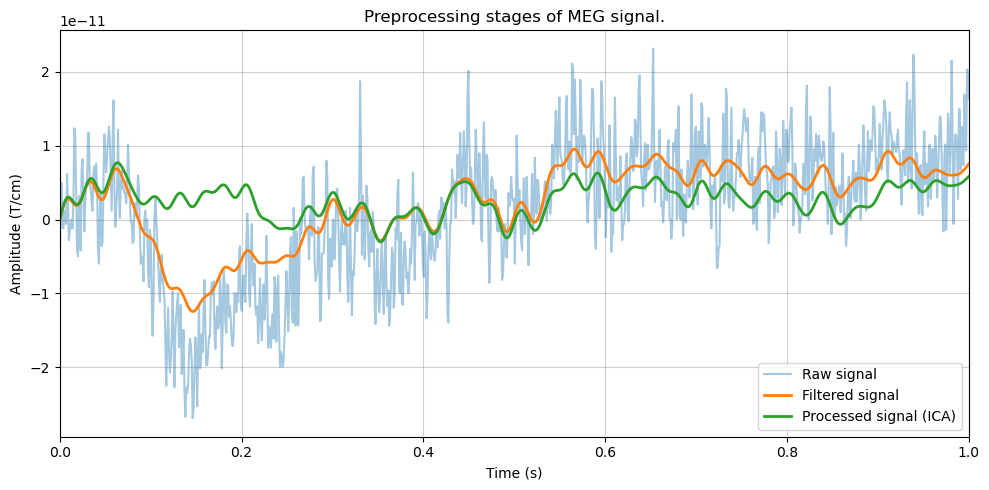

In [9]:
f = 1000
start = 0 * f
stop = 1 * f

raw_data = raw_meg_file.get_data(picks = channel, start = start, stop = stop)[0]
sss_data = sss_meg_file.get_data(picks = channel, start = start, stop = stop)[0]
ica_data = ica_meg_file.get_data(picks = channel, start = start, stop = stop)[0]
time = np.linspace(start, stop, len(raw_data))/f
plt.figure(figsize=(10, 5))

plt.xlabel('Time (s)')
plt.ylabel('Amplitude (T/cm)')
plt.title(f"Preprocessing stages of MEG signal.")
plt.xlim(start,stop/f)
plt.plot(time,raw_data, label = "Raw signal", alpha = 0.4)
plt.plot(time,sss_data, label = "Filtered signal", linewidth = 2)
plt.plot(time,ica_data, label = "Processed signal (ICA)", linewidth = 2)
plt.legend()
plt.grid(alpha = 0.6)
plt.tight_layout()
fig_path = os.path.join(plots_folder, f"processing_effect.png")
plt.savefig(fig_path, dpi=1200)
plt.show()


# PSD plots

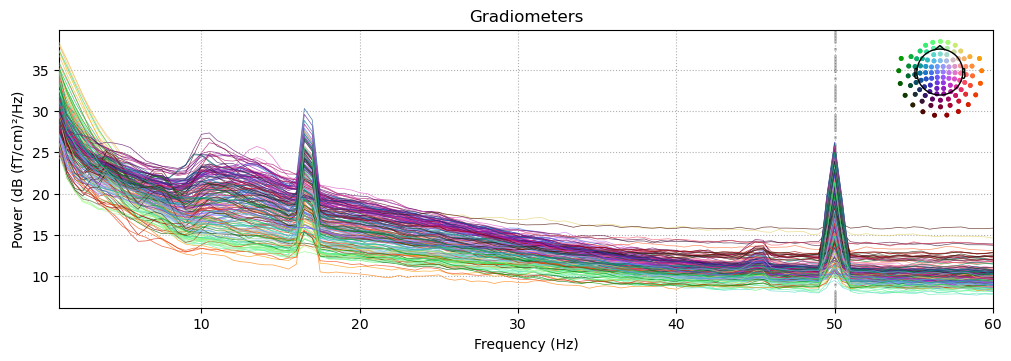

In [6]:
n_fft = 2000

PSD_data = raw_meg_file.compute_psd(method="welch", fmin=1, fmax=60, picks="grad", n_fft=n_fft, n_overlap=int(n_fft/2), verbose = False)
fig = PSD_data.plot(show=True) 
#fig.suptitle(f"Power Spectral Density: {subID}_{session} Raw", fontsize=16)
fig.savefig(f"{plots_folder}/psd_raw.png", dpi = 600)
plt.show(fig)
plt.close(fig)


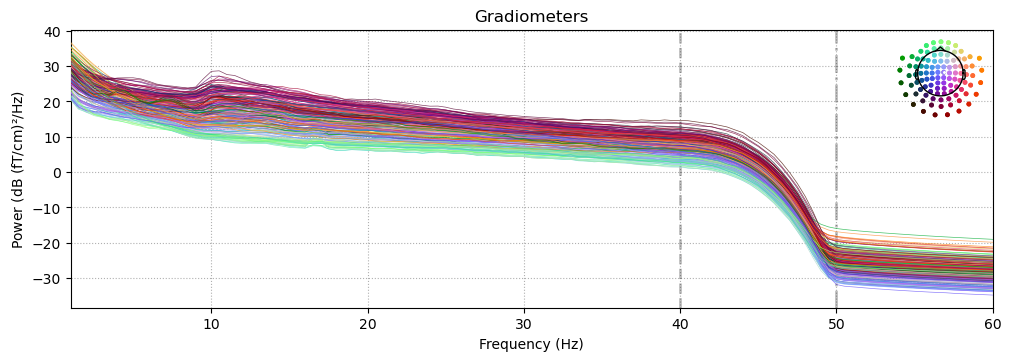

In [7]:
data1PSD = sss_meg_file.compute_psd(method="welch", fmin=1, fmax=60, picks="grad", n_fft=n_fft, n_overlap=int(n_fft/2), verbose = False)
fig = data1PSD.plot(show=True) 
#fig.suptitle(f"Power Spectral Density: {subID}_{session} SSS", fontsize=16)
fig.savefig(f"{plots_folder}/psd_sss.png", dpi = 600)
plt.show(fig)
plt.close(fig)

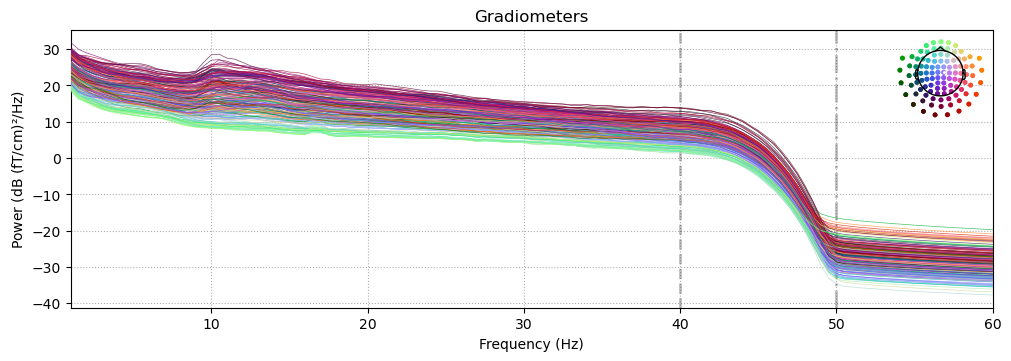

In [8]:
icaPSD = ica_meg_file.compute_psd(method="welch", fmin=1, fmax=60, picks="grad", n_fft=n_fft, n_overlap=int(n_fft/2), verbose = False)
fig = icaPSD.plot(show=True) 
#fig.suptitle(f"Power Spectral Density: {subID}_{session} ICA", fontsize=16)
fig.savefig(f"{plots_folder}/psd_ICA.png", dpi = 600)
plt.show(fig)
plt.close(fig)